## Text blob analyysis on "Coronavirus Related Tweets"

In [6]:
from textblob import TextBlob
import tweepy
from tweepy import OAuthHandler
 
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''
# Authenticate your application 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [7]:
 ''' 
Utility function to clean tweet text by removing links, special characters  
'''
def cleanTweet(tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

def percentage(part, whole):
    
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

def plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
    labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
              'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
    sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
    colors = ['blue','green','darkgreen', 'gold', 'yellow','lightsalmon','darkred']
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title('Reactions of people on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


The polarity score is a float within the range [-1.0, 1.0] where negative value indicates negative text and positive value indicates that the given text is positive.

The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [8]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt
tweets = []
tweetText = []
d = {}
searchTerm = input("the item you want to search:")
NoOfTerms = int(input("Enter how many tweets to search: "))

        # searching for tweets
tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)
csvFile = open('Covid.csv', 'a')

        # Use csv writer
csvWriter = csv.writer(csvFile)

        # creating some variables to store info
polarity = 0
positive = 0
wpositive = 0
spositive = 0
negative = 0
wnegative = 0
snegative = 0
neutral = 0
for tweet in tweets:
      
    #Append to temp so that we can store in csv later. I use encode UTF-8
    tweetText.append(cleanTweet(tweet.text).encode('utf-8'))
    # print (tweet.text.translate(non_bmp_map))    #print tweet's text
    analysis = TextBlob(tweet.text)
    # print(analysis.sentiment)  # print tweet's polarity
    polarity += analysis.sentiment.polarity  # adding up polarities to find the average later
    subjectivity= analysis.sentiment.polarity

    if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
        wpositive += 1
    elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
        positive += 1
    elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
        spositive += 1
    elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
        wnegative += 1
    elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
        negative += 1
    elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
        snegative += 1
        # Write to csv and close csv file
csvWriter.writerow(tweetText)
csvFile.close()

the item you want to search:coronavirus
Enter how many tweets to search: 1000


In [13]:
# finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative =  percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)

# finding average reaction
polarity = polarity / NoOfTerms

# printing out data
print("People reactions on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("General Report: ")
if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

People reactions on coronavirus by analyzing 1000 tweets.

General Report: 
Weakly Positive


In [10]:
print()
print("Report: ")
print(str(positive) + "% people thinks it is positive")
print(str(wpositive) + "% people thinks it is weakly positive")
print(str(spositive) + "% people thinks it is strongly positive")
print(str(negative) + "% people thinks it is negative")
print(str(wnegative) + "% people thinks it is weakly negative")
print(str(snegative) + "% people thinks it is strongly negative")
print(str(neutral) + "% people thinks it is neutral")


Report: 
8.60% people thinks it is positive
22.70% people thinks it is weakly positive
1.30% people thinks it is strongly positive
4.00% people thinks it is negative
20.00% people thinks it is weakly negative
0.80% people thinks it is strongly negative
42.10% people thinks it is neutral


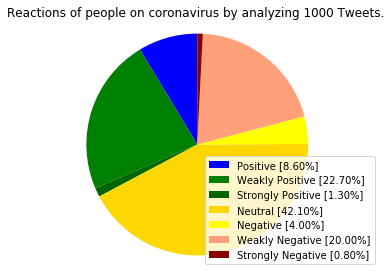

In [11]:
plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)